In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
import time
#import csv

#from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path = "D:/chromedriver3.exe")
driver = webdriver.Chrome(service=service)


list1 = []
list2 = []
list3 = []

i = 0 

#path = 'D:/chromedriver.exe'
#driver = webdriver.Chrome(path) 
#查詢頁面網址
driver.get('https://c.8891.com.tw/Models') 

#選SUV
driver.find_element(By.XPATH, '//*[@id="findCar"]/div/div[2]/div[2]/div[1]/div[2]/div[2]/div/div[2]').click()  
time.sleep(1)

#-------------------------------------------------
# 等{在售}出來
try :  
  WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, '//*[@id="findCar"]/div/div[2]/div[4]/div[1]/div[1]/ul/li[1]'))
  )
except : 
   print("kiki")

time.sleep(3)

#選價格低優先
driver.find_element(By.XPATH, '//*[@id="findCar"]/div/div[2]/div[4]/div[1]/div[1]/div/label[3]').click()    

time.sleep(2)


for i in range(1,9) : 

  #向下滑動
  js = "window.scrollTo(0, document.body.scrollHeight);"
  driver.execute_script(js) 
  time.sleep(3)

  #車名
  titles = driver.find_elements(By.CLASS_NAME, "item-brand--BSCAe")     

  #價錢
  prices = driver.find_elements(By.CLASS_NAME, "item-price--R8vOw")  

  for title in titles :  
    name = title.text
    list1.append(name)

  for title in prices :  
    name1 = title.text
    list2.append(name1)


  time.sleep(1)
  
  if i <= 5 :
    #下一頁，反覆做
    driver.find_element(By.CLASS_NAME, 'ant-pagination-next').click()  
    time.sleep(1)

  else : 
    #下一頁，反覆做
    driver.find_element(By.CLASS_NAME, 'ant-pagination-next').click()  
    time.sleep(1)

  #往上滑
  js = "window.scrollTo(document.body.scrollHeight, 0);"
  driver.execute_script(js) 
  time.sleep(3)


  i = i + 1 
  

print(list1)  
print(list2)  

time.sleep(3)

driver.quit()


['Mahindra KUV100', 'Toyota Yaris Cross', 'CMC Zinger', 'Hyundai Venue', 'MG ZS', 'Luxgen U6 Neo', 'Kia Stonic', 'Nissan Kicks', 'Honda HR-V', 'Suzuki Jimny', 'Mazda CX-3', 'Toyota Corolla Cross', 'Luxgen URX Neo', 'MG HS', 'Mitsubishi Outlander', 'Mazda CX-30', 'Suzuki Vitara', 'Volkswagen T-Cross', 'Ford Kuga', 'Ford Focus Active', 'Suzuki SX4 S-Cross', 'Hyundai Tucson', 'Skoda Kamiq', 'Toyota RAV4', 'Nissan Juke', 'Ssangyong Korando', 'Nissan X-Trail', 'Honda CR-V', 'Citroen C4', 'Mazda CX-5', 'Luxgen n7', 'Mitsubishi Eclipse Cross', 'Opel Mokka', 'Subaru Crosstrek', 'Kia Sportage', 'Skoda Karoq', 'Subaru Forester', 'Mazda CX-60', 'Volkswagen T-Roc', 'Volkswagen Tiguan', 'Peugeot 2008', 'Opel Grandland', 'Lexus LBX', 'Mitsubishi Eclipse Cross PHEV', 'Opel Mokka-e', 'Citroen C5 Aircross', 'Volvo XC40', 'Ssangyong Korando e-Motion', 'Mazda CX-9', 'Peugeot 3008', 'Lexus UX', 'Skoda Kodiaq', 'Kia Sorento', 'Citroen E-C4', 'Audi Q2', 'Hyundai Ioniq 5', 'Peugeot 5008', 'Kia EV6', 'Toyota 

In [27]:
#--------
import pandas as pd 



car_data = pd.DataFrame({
    'Car Name': list1,
    'Price Range (萬)': list2
})

print(car_data)


                 Car Name   Price Range (萬)
0         Mahindra KUV100            55.80萬
1      Toyota Yaris Cross      71.00-82.00萬
2              CMC Zinger      71.90-91.50萬
3           Hyundai Venue      72.90-78.90萬
4                   MG ZS            74.90萬
..                    ...               ...
139      Lamborghini Urus  1198.00-1380.00萬
140    Ferrari Purosangue          2221.00萬
141  Rolls-Royce Cullinan  2439.30-2709.00萬
142    Ferrari Purosangue          2221.00萬
143  Rolls-Royce Cullinan  2439.30-2709.00萬

[144 rows x 2 columns]


In [28]:
import re 

def parse_price(price_str):
    # 移除非數字和小數點的字符
    prices = re.findall(r'\d+\.\d+', price_str)
    # 如果是範圍，取平均值
    if len(prices) == 2:
        return (float(prices[0]) + float(prices[1])) / 2
    elif len(prices) == 1:
        return float(prices[0])
    else:
        return None

# 將價格轉換為數字
car_data['Price Range (萬)'] = car_data['Price Range (萬)'].apply(parse_price)

print(car_data)

                 Car Name  Price Range (萬)
0         Mahindra KUV100            55.80
1      Toyota Yaris Cross            76.50
2              CMC Zinger            81.70
3           Hyundai Venue            75.90
4                   MG ZS            74.90
..                    ...              ...
139      Lamborghini Urus          1289.00
140    Ferrari Purosangue          2221.00
141  Rolls-Royce Cullinan          2574.15
142    Ferrari Purosangue          2221.00
143  Rolls-Royce Cullinan          2574.15

[144 rows x 2 columns]


ValueError: Image size of 1000000x200000 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x0000024BCCDB2B90> (for post_execute):


ValueError: Image size of 1000000x200000 pixels is too large. It must be less than 2^16 in each direction.

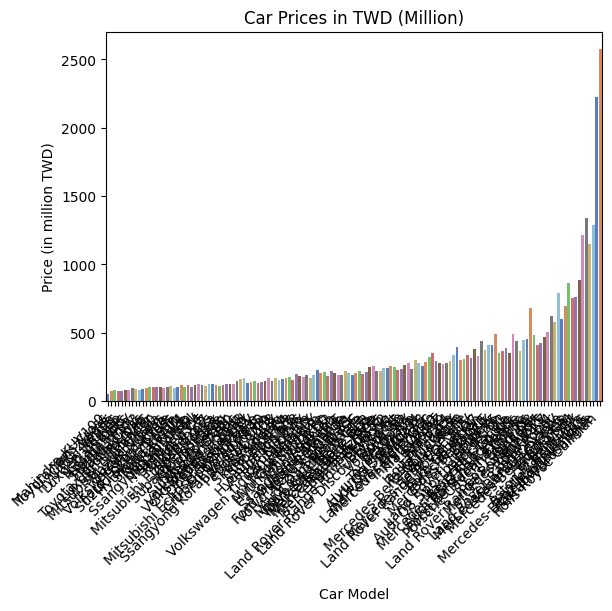

<Figure size 1e+06x200000 with 0 Axes>

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.barplot(data=car_data, x='Car Name', y='Price Range (萬)', palette='muted')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Label the axes
plt.xlabel('Car Model')
plt.ylabel('Price (in million TWD)')

# Title for the plot
plt.title('Car Prices in TWD (Million)')

plt.figure(figsize=(10000,2000))

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
car_data.to_csv('car.csv', index=False, encoding='utf-8-sig')        #轉成csv檔
